In [1]:
import numpy as np
import xarray as xr
ny, nx = (128, 256)
mask_data = np.ones((ny, nx))
mask_data[(ny // 4):(3 * ny // 4), (nx // 4):(3 * nx // 4)] = 0
wet_mask = xr.DataArray(mask_data, dims=['y', 'x'])

In [3]:
import gcm_filters
filter = gcm_filters.Filter(
     filter_scale=4,
     dx_min=1,
     filter_shape=gcm_filters.FilterShape.TAPER,
     grid_type=gcm_filters.GridType.REGULAR_WITH_LAND,
     grid_vars={'wet_mask': wet_mask}
 )

In [8]:
nt = 10
data = np.random.rand(ny, nx)
da = xr.DataArray(data, dims=['y', 'x'])
da_masked = da.where(wet_mask)

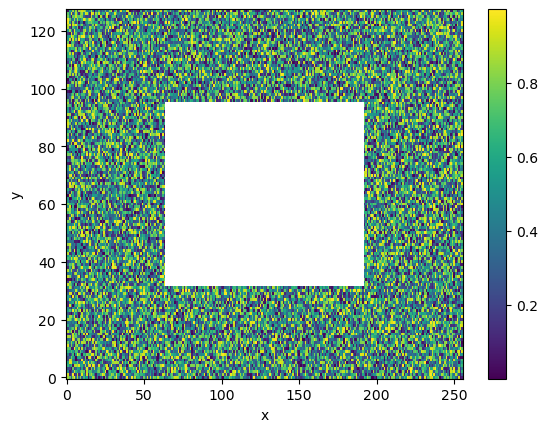

In [10]:
da_masked.plot()

In [14]:
da_filtered = filter.apply(da_masked, dims=['y', 'x'])
da_filtered_fail = filter.apply(da_masked.fillna(100), dims=['y', 'x'])

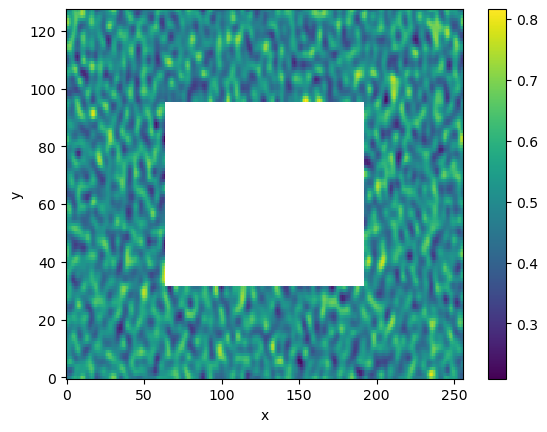

In [13]:
da_filtered.plot()

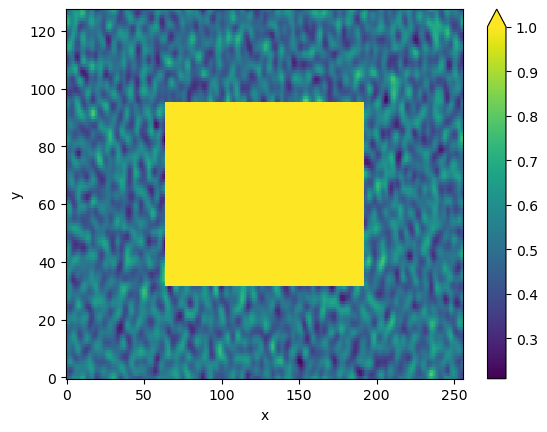

In [16]:
da_filtered_fail.plot(vmax=1)